# LIBRERIAS

In [1]:
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

from statistics import mean 
from itertools import product
from sklearn.model_selection import TimeSeriesSplit

C:\Users\migue\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# LECTURA DE DATOS

In [3]:
# Leo los tipos de cambio de las divisas

wheat = pd.read_excel('./data/Series de precios.xlsx', sheet_name='Hoja2', 
                        usecols=['Date','Wheat'])
wheat.columns = ['Date','Precio']
wheat['Date'] = pd.to_datetime(wheat['Date'], format="%Y-%m-%d")
wheat = wheat.set_index('Date')
wheat = wheat.loc['2015-04-30':,:]
wheat = wheat.applymap(lambda x: x/1.1285216494845334)

In [4]:
wheat.head()

,Precio
Date,
2015-04-30,321.216700
2015-05-01,318.779884
2015-05-04,317.893769
2015-05-05,320.109056
2015-05-06,324.761160


In [5]:
# Calculo los retornos de cada día

wheat['Retornos diarios'] = 0

for i in range(1, len(wheat)):
    
    wheat['Retornos diarios'].iloc[i] = wheat.Precio.iloc[i] - wheat.Precio.iloc[i-1]


In [6]:
# Visualizo una muestra

wheat.head(20)

,Precio,Retornos diarios
Date,,
2015-04-30,321.216700,0.000000
2015-05-01,318.779884,-2.436816
2015-05-04,317.893769,-0.886115
2015-05-05,320.109056,2.215288
2015-05-06,324.761160,4.652104
2015-05-07,317.007653,-7.753507
2015-05-08,317.672240,0.664586
2015-05-11,317.450711,-0.221529
2015-05-12,316.343067,-1.107644


In [7]:
# Calculo las ganancias y pérdidas // Tuve que meter un cero porque si dejo un string vacío o np.nan da problemas y 
# paso de comerme la cabeza, habra una solucion mejor pero esta es rapida

wheat['Ganancias'] = np.where((wheat['Retornos diarios']>0), round(wheat['Retornos diarios'],4), 0)
wheat['Perdidas'] = np.where((wheat['Retornos diarios']<0), round(wheat['Retornos diarios'],4), 0)

In [8]:
# Visualizo una muestra

wheat.head(10)

,Precio,Retornos diarios,Ganancias,Perdidas
Date,,,,
2015-04-30,321.216700,0.000000,0.0000,0.0000
2015-05-01,318.779884,-2.436816,0.0000,-2.4368
2015-05-04,317.893769,-0.886115,0.0000,-0.8861
2015-05-05,320.109056,2.215288,2.2153,0.0000
2015-05-06,324.761160,4.652104,4.6521,0.0000
2015-05-07,317.007653,-7.753507,0.0000,-7.7535
2015-05-08,317.672240,0.664586,0.6646,0.0000
2015-05-11,317.450711,-0.221529,0.0000,-0.2215
2015-05-12,316.343067,-1.107644,0.0000,-1.1076


In [9]:
# Ahora calculo la media de ganancias y pérdidas en periodos de 14 dias

wheat['Media ganancias'] = wheat.Ganancias.rolling(window=14).mean()
wheat['Media perdidas'] = wheat.Perdidas.rolling(window=14).mean()

In [10]:
# Visualizo una muestra

wheat.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas
Date,,,,,,
2015-04-30,321.216700,0.000000,0.0000,0.0000,NaN,NaN
2015-05-01,318.779884,-2.436816,0.0000,-2.4368,NaN,NaN
2015-05-04,317.893769,-0.886115,0.0000,-0.8861,NaN,NaN
2015-05-05,320.109056,2.215288,2.2153,0.0000,NaN,NaN
2015-05-06,324.761160,4.652104,4.6521,0.0000,NaN,NaN
2015-05-07,317.007653,-7.753507,0.0000,-7.7535,NaN,NaN
2015-05-08,317.672240,0.664586,0.6646,0.0000,NaN,NaN
2015-05-11,317.450711,-0.221529,0.0000,-0.2215,NaN,NaN
2015-05-12,316.343067,-1.107644,0.0000,-1.1076,NaN,NaN


In [11]:
# Calculo el RS, el cociente entre ganancias medias y perdidas medias

wheat['RS'] = abs(wheat['Media ganancias'] / wheat['Media perdidas'])

In [12]:
# Visualizo una muestra

wheat.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS
Date,,,,,,,
2015-04-30,321.216700,0.000000,0.0000,0.0000,NaN,NaN,NaN
2015-05-01,318.779884,-2.436816,0.0000,-2.4368,NaN,NaN,NaN
2015-05-04,317.893769,-0.886115,0.0000,-0.8861,NaN,NaN,NaN
2015-05-05,320.109056,2.215288,2.2153,0.0000,NaN,NaN,NaN
2015-05-06,324.761160,4.652104,4.6521,0.0000,NaN,NaN,NaN
2015-05-07,317.007653,-7.753507,0.0000,-7.7535,NaN,NaN,NaN
2015-05-08,317.672240,0.664586,0.6646,0.0000,NaN,NaN,NaN
2015-05-11,317.450711,-0.221529,0.0000,-0.2215,NaN,NaN,NaN
2015-05-12,316.343067,-1.107644,0.0000,-1.1076,NaN,NaN,NaN


In [13]:
# Ahora calculo RSI, la formula es 100 - 100 / (1 + RS)

wheat['RSI'] = 100 - 100 / (1 + wheat['RS'])

In [14]:
# Visualizo una muestra

wheat.head(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS,RSI
Date,,,,,,,,
2015-04-30,321.216700,0.000000,0.0000,0.0000,NaN,NaN,NaN,NaN
2015-05-01,318.779884,-2.436816,0.0000,-2.4368,NaN,NaN,NaN,NaN
2015-05-04,317.893769,-0.886115,0.0000,-0.8861,NaN,NaN,NaN,NaN
2015-05-05,320.109056,2.215288,2.2153,0.0000,NaN,NaN,NaN,NaN
2015-05-06,324.761160,4.652104,4.6521,0.0000,NaN,NaN,NaN,NaN
2015-05-07,317.007653,-7.753507,0.0000,-7.7535,NaN,NaN,NaN,NaN
2015-05-08,317.672240,0.664586,0.6646,0.0000,NaN,NaN,NaN,NaN
2015-05-11,317.450711,-0.221529,0.0000,-0.2215,NaN,NaN,NaN,NaN
2015-05-12,316.343067,-1.107644,0.0000,-1.1076,NaN,NaN,NaN,NaN


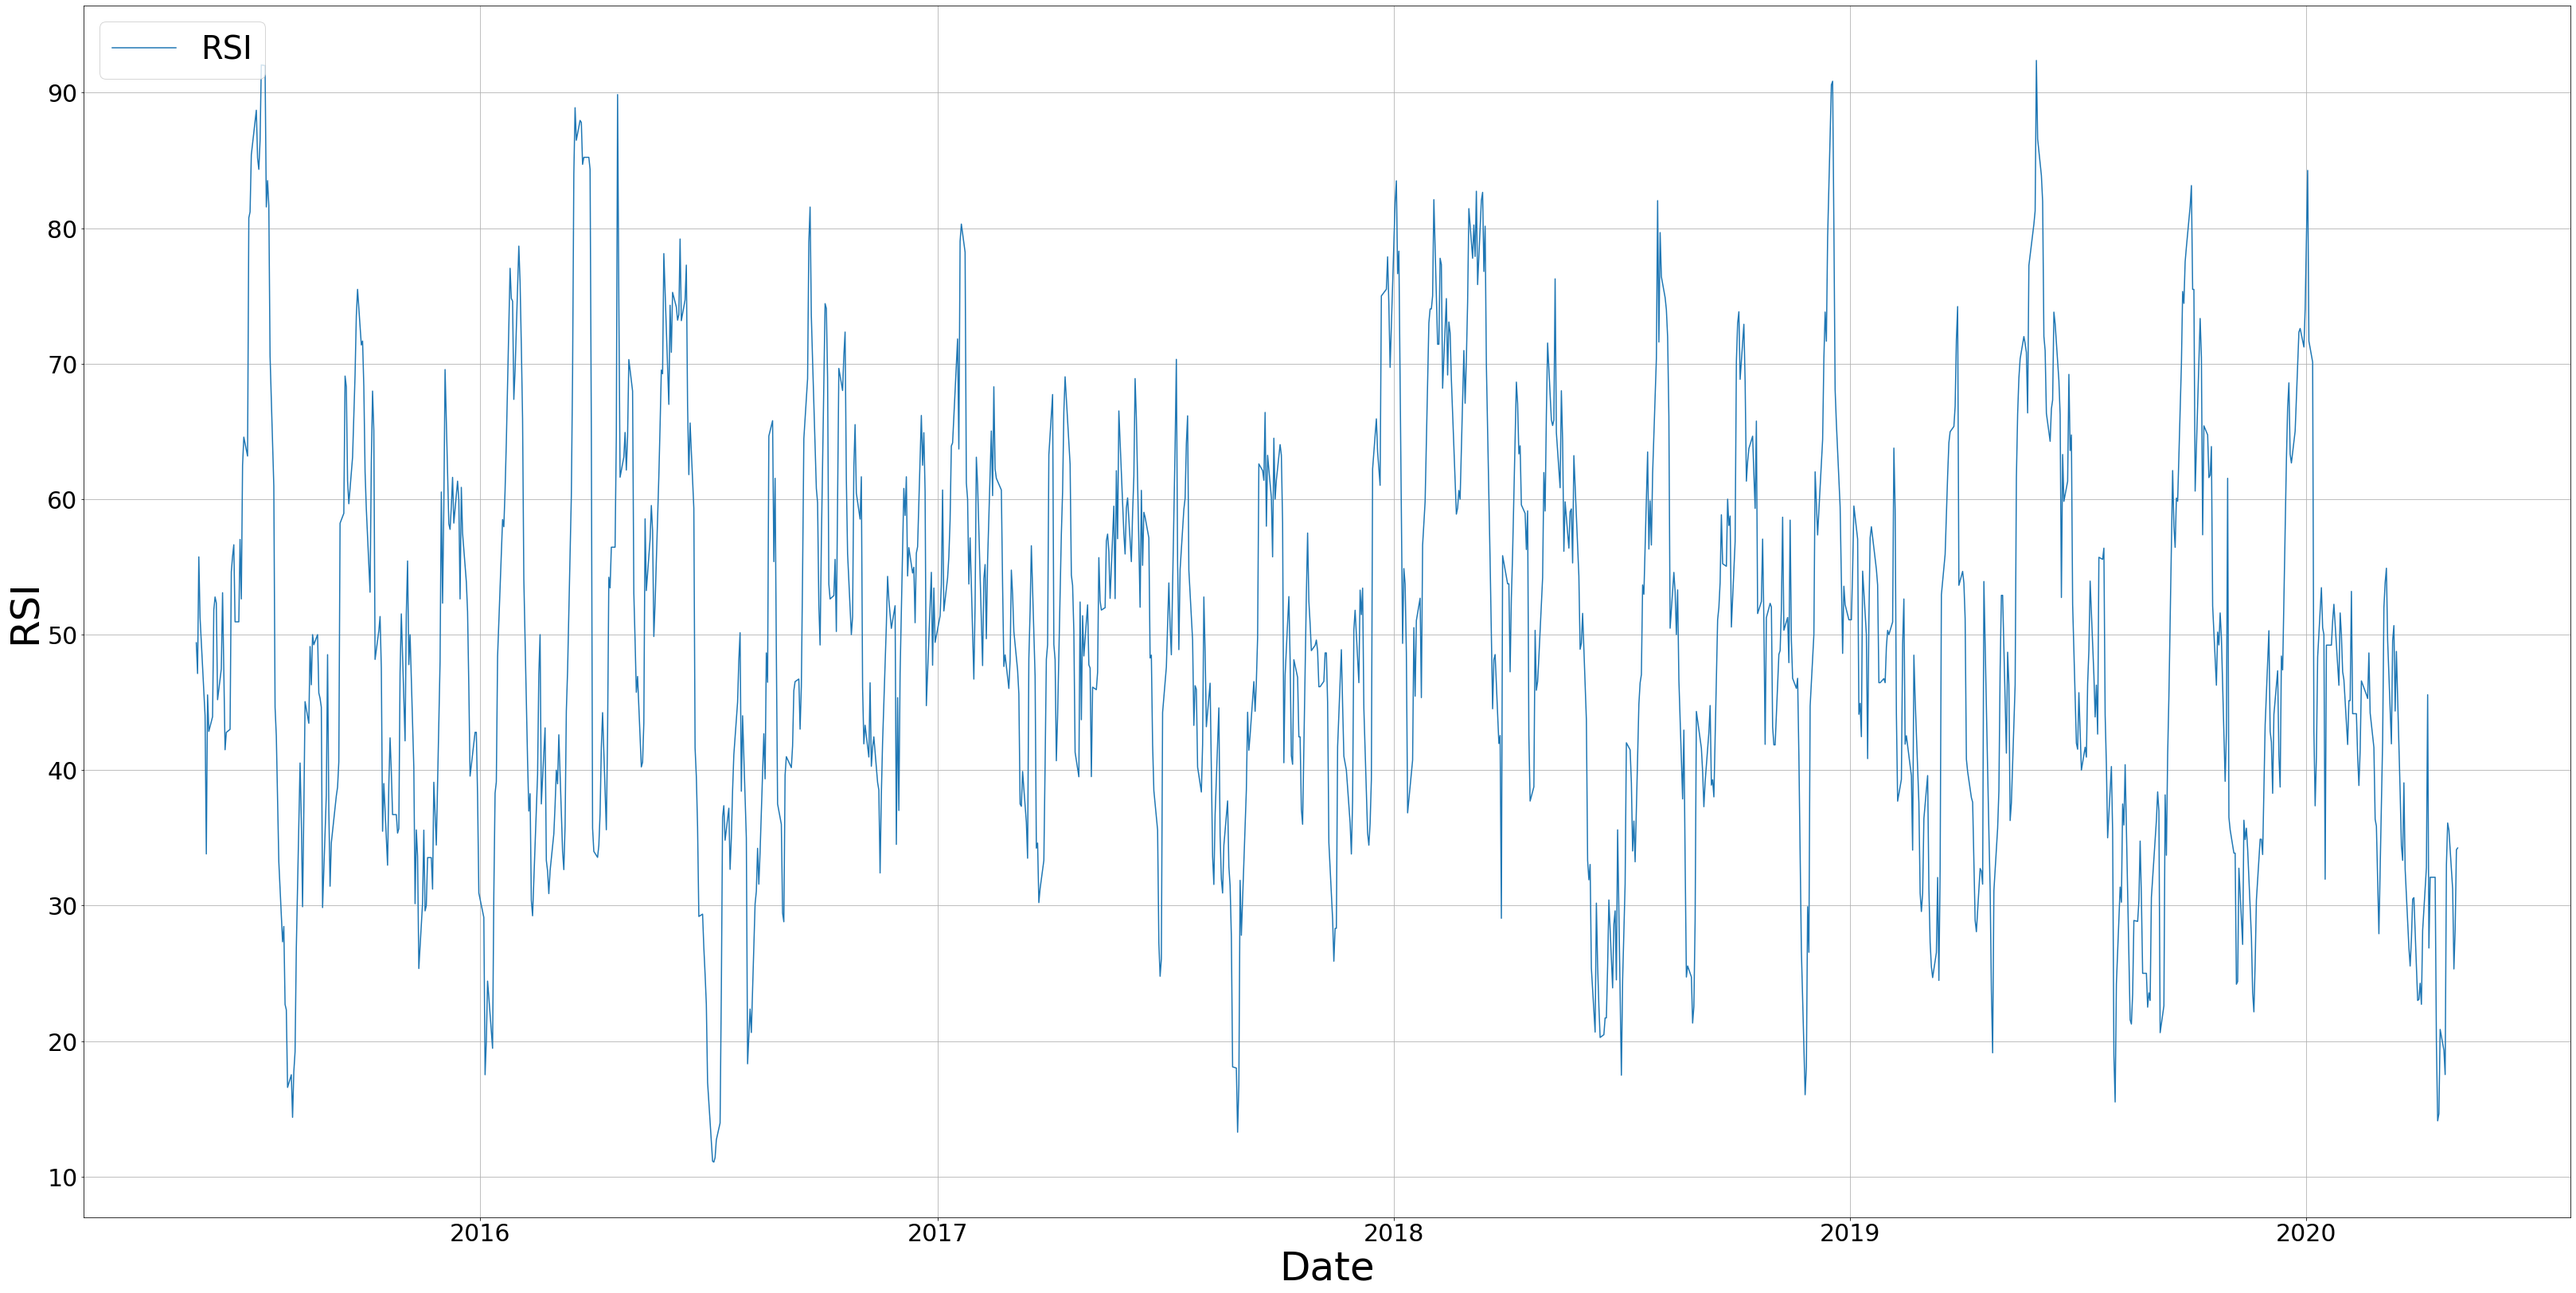

In [15]:
# Grafico la evolución del RSI

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(wheat["RSI"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("RSI", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["RSI"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [16]:
# Genero la señal de compra y venta // sobrecompra(-1) -> RSI >= 70 - sobreventa(1) -> RSI <= 30

wheat['Señal'] = np.where(wheat.RSI >= 70, -1, np.where(wheat.RSI <= 30, 1, 0))

In [17]:
# Visualizo una muestra

wheat.tail(20)

,Precio,Retornos diarios,Ganancias,Perdidas,Media ganancias,Media perdidas,RS,RSI,Señal
Date,,,,,,,,,
2020-04-03,293.082548,-2.436816,0.0000,-2.4368,0.981050,-2.500100,0.392404,28.181779,1
2020-04-06,290.424202,-2.658345,0.0000,-2.6583,0.981050,-2.009571,0.488189,32.804219,0
2020-04-07,293.747134,3.322931,3.3229,0.0000,1.218400,-1.455750,0.836957,45.562141,0
2020-04-08,292.417961,-1.329173,0.0000,-1.3292,0.569636,-1.550693,0.367343,26.865445,1
2020-04-09,293.968663,1.550701,1.5507,0.0000,0.680400,-1.439929,0.472523,32.089366,0
2020-04-13,293.747134,-0.221529,0.0000,-0.2215,0.680400,-1.439929,0.472523,32.089366,0
2020-04-14,288.873501,-4.873633,0.0000,-4.8736,0.443050,-1.788043,0.247785,19.857981,1
2020-04-15,282.892225,-5.981276,0.0000,-5.9813,0.363936,-2.215279,0.164284,14.110333,1
2020-04-16,283.335282,0.443058,0.4431,0.0000,0.379764,-2.215279,0.171430,14.634220,1


In [18]:
# Genero un nuevo dataframe donde ver los resultados de la estrategia

Resultados = wheat.loc[:,['Precio', 'Señal']]
Resultados.head()

,Precio,Señal
Date,,
2015-04-30,321.216700,0
2015-05-01,318.779884,0
2015-05-04,317.893769,0
2015-05-05,320.109056,0
2015-05-06,324.761160,0


In [19]:
# Creo la variable que muestra los resultados

Resultados['Mean Rev'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Mean Rev'].iloc[i] = Resultados['Mean Rev'].iloc[i-1]*(1+Resultados.Señal.iloc[i-1]*
                                                                          (Resultados.Precio.iloc[i]/Resultados.Precio.iloc[i-1]-1))

In [20]:
# Visualizo una muestra

Resultados.tail(20)

,Precio,Señal,Mean Rev
Date,,,
2020-04-03,293.082548,1,129.756919
2020-04-06,290.424202,0,128.579986
2020-04-07,293.747134,0,128.579986
2020-04-08,292.417961,1,128.579986
2020-04-09,293.968663,0,129.261849
2020-04-13,293.747134,0,129.261849
2020-04-14,288.873501,1,129.261849
2020-04-15,282.892225,1,126.585415
2020-04-16,283.335282,1,126.783670


In [21]:
# Genero el Buy&Hold para hacer la comparación

Resultados['Buy&Hold'] = 100

for i in range(1, len(Resultados)):
    
    Resultados['Buy&Hold'].iloc[i] = Resultados['Buy&Hold'].iloc[i-1]*(1+(Resultados.Precio.iloc[i]/
                                                                         Resultados.Precio.iloc[i-1]-1))

In [22]:
# Visualizo una muestra

Resultados.sample(20)

,Precio,Señal,Mean Rev,Buy&Hold
Date,,,,
2019-04-17,317.450711,0,142.918289,98.827586
2019-09-10,308.811089,0,127.950738,96.137931
2016-07-08,309.918733,1,107.433221,96.482759
2019-01-22,335.837598,0,136.905269,104.551724
2020-02-05,337.388299,0,128.957972,105.034483
2019-02-27,322.324344,1,136.905269,100.344828
2015-09-01,315.456952,0,108.685395,98.206897
2017-07-14,323.653516,0,129.478239,100.758621
2019-03-25,336.502184,0,135.585522,104.758621


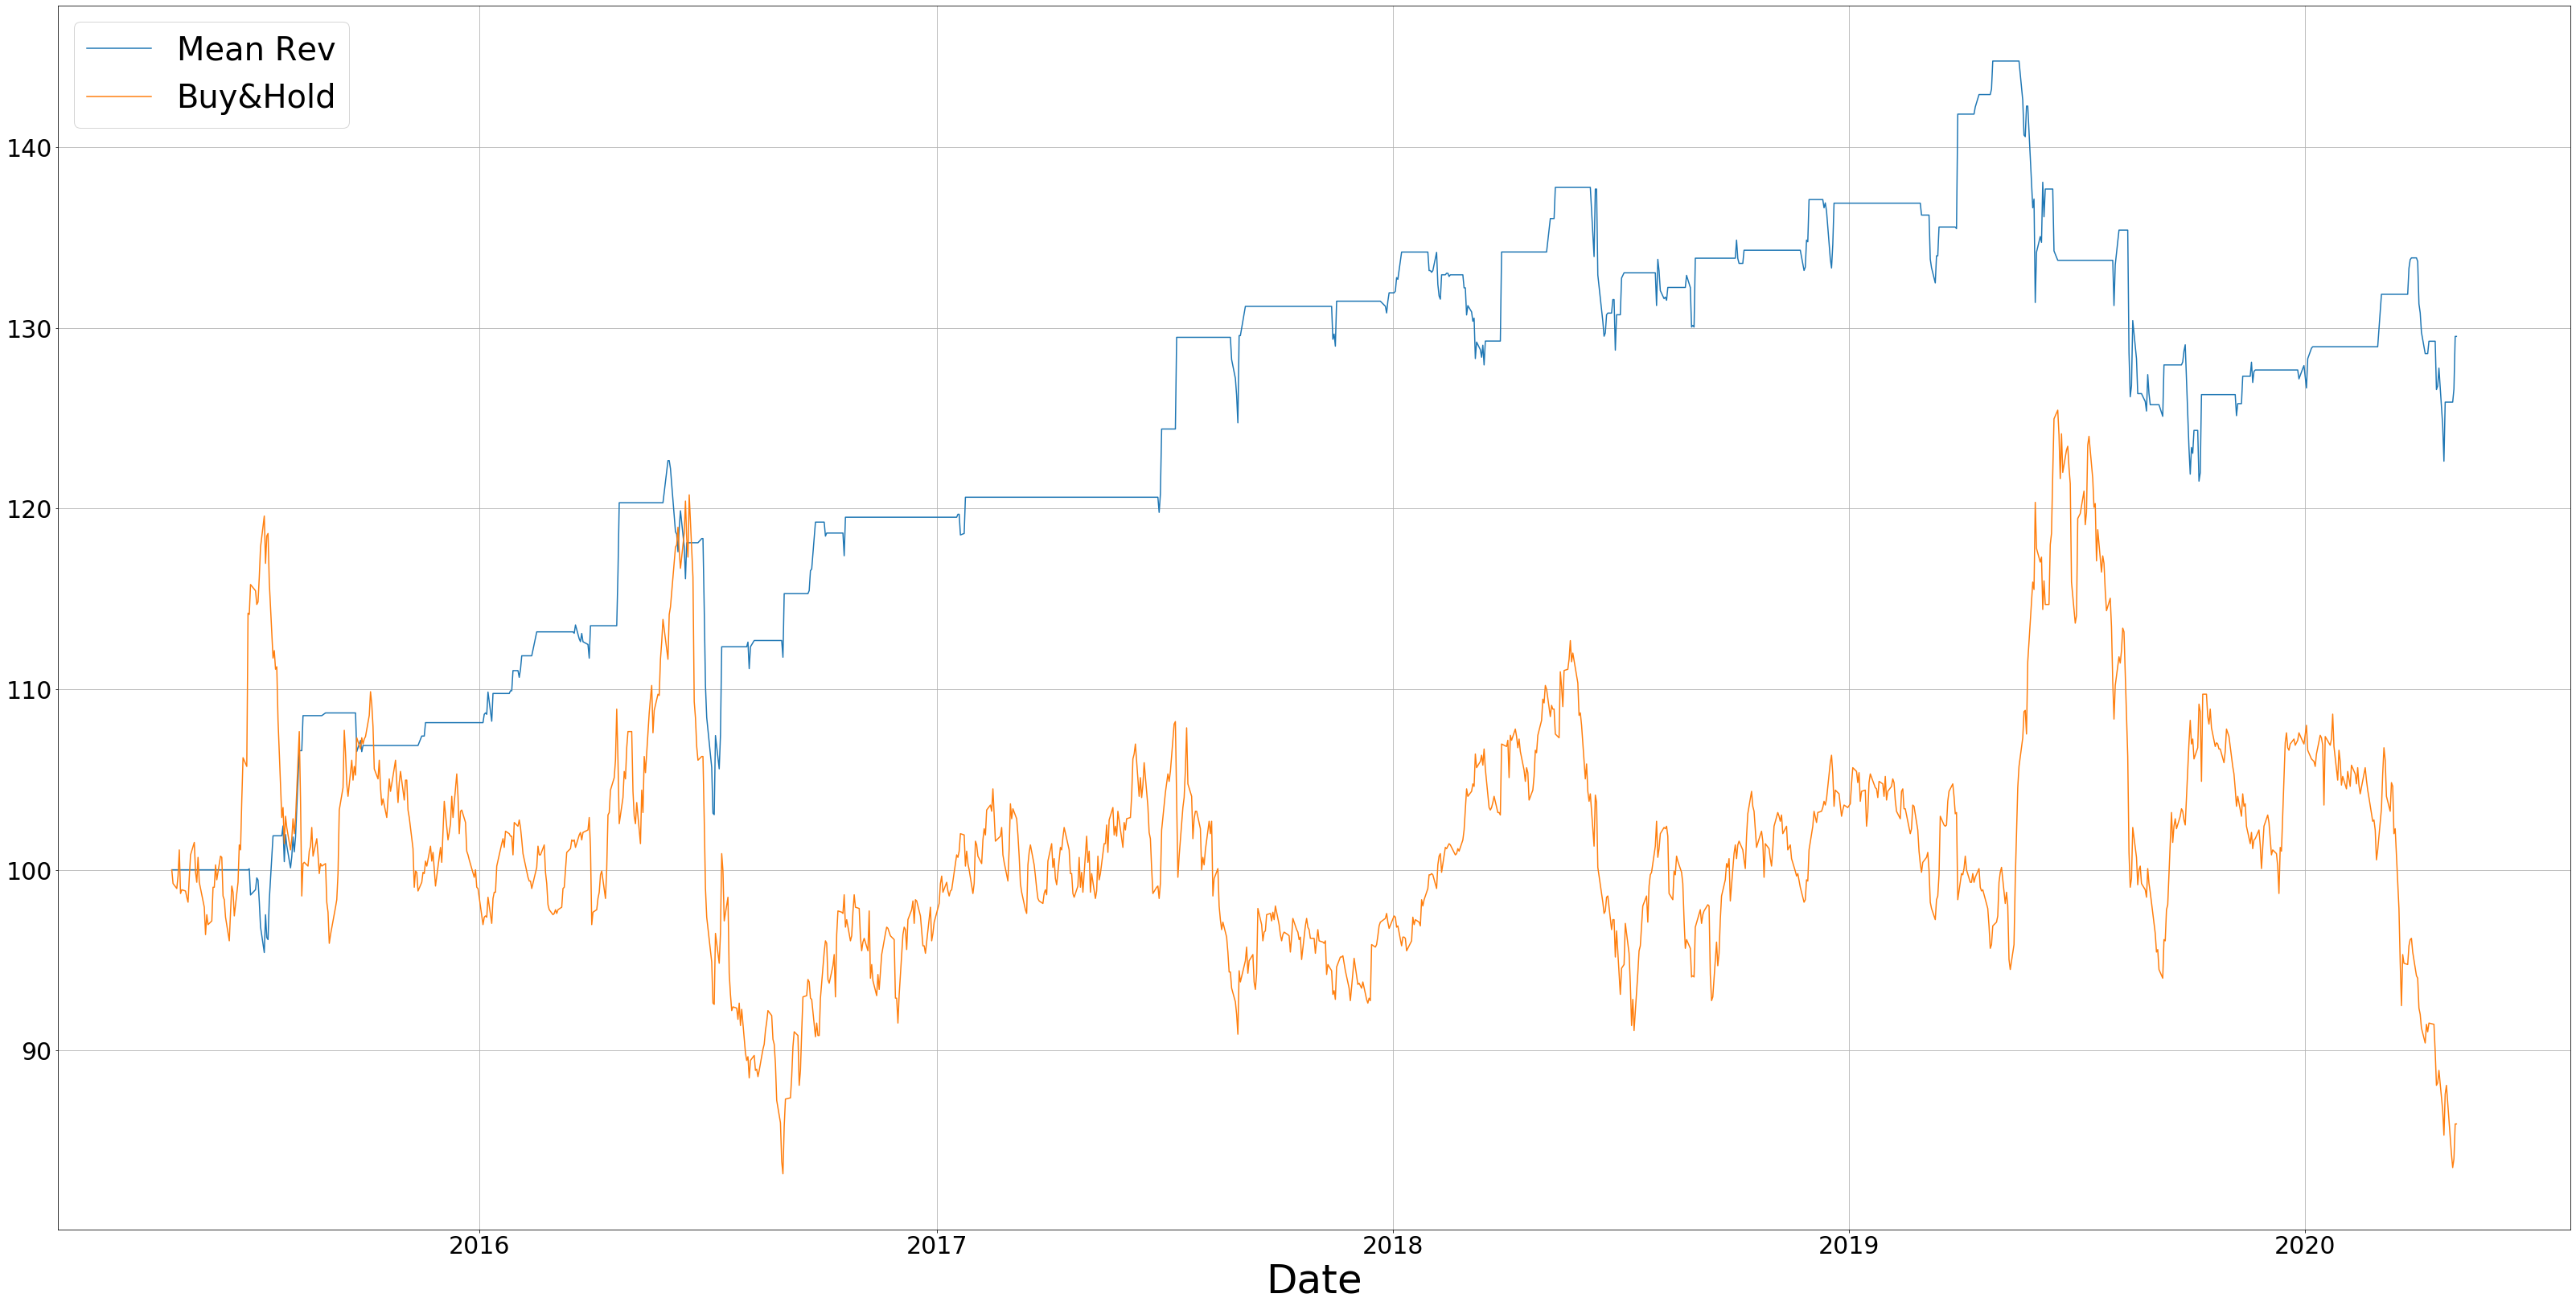

In [23]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Resultados["Mean Rev"])
ax1 = plt.plot(Resultados["Buy&Hold"])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Mean Rev", "Buy&Hold"],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [24]:
wheat_RSI = pd.DataFrame(Resultados.loc[:, 'Mean Rev'])
wheat_RSI.columns = ['MeanRev_wheat']
wheat_RSI

,MeanRev_wheat
Date,
2015-04-30,100.000000
2015-05-01,100.000000
2015-05-04,100.000000
2015-05-05,100.000000
2015-05-06,100.000000
2015-05-07,100.000000
2015-05-08,100.000000
2015-05-11,100.000000
2015-05-12,100.000000


In [25]:
wheat_RSI.to_csv('./data_resultante/wheat_RSI.csv')